# **Biodiversity Observing System Simulation Experiment (BOSSE v1.0) Tutorial**

This tutoral shows how to  use the BOSSE class to simulate Scenes snapshots and time series, extracting different variables with ad-hoc features (e.g., uncertainty or spatial resolution), plot them, and analyze functional diversity using the PyGNDiv package.

## **Import packages**

Import Python packages

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import BOSSE and pyGNDIv packages from local folders

In [2]:
# Import BOSSE and pyGNDIV
parent_foler = os.path.abspath(
    os.path.join(os.path.abspath(
        os.path.join(os.getcwd(), os.pardir)), os.pardir))
path_bosse = (parent_foler + '//pyBOSSE//')

sys.path.insert(0, path_bosse)
from BOSSE.bosse import BosseModel
from BOSSE.helpers import set_up_paths_and_inputs, print_dict

from pyGNDiv import pyGNDiv_imagery as gni

## **1) INTIALIZATOIN**
This section shows how to intialize the BOSSE class, and how to initialize a scene with different features

Set the path from where BOSSE load differeint inputs

In [3]:
pth_inputs= path_bosse + '//BOSSE_inputs//'

Set output folder

In [4]:
output_folder = parent_foler + '//tutorial_bosse_v1_0_figures//'

Generate standard set of input options and paths


In [5]:
(inputs_, paths_) = set_up_paths_and_inputs(None, output_folder,
                                            pth_inputs=pth_inputs)

These are the default configuration options. However, it woudl be possible to change the inputs before the BOSSE class or the scene are initialized. For example, the spatial patterns inputs_['sp_pattern'] = 'clustered'

In [6]:
print_dict(inputs_, 'inputs')

inputs
	rseed_num: 100
	subfolder_out: bosse_outputs//intermediate//
	scene_sz: 60
	S_max: 40
	sensor: _Hy
	spat_res: 100
	sp_pattern: intermediate
	clim_zone: continental
	inspect: False
	verbose: False


Initialize BOSSE class


In [7]:
bosse_M = BosseModel(inputs_, paths_)

Update the input options dictionary. Setting up "inputs_['inspect'] = True" will produce several outputs in the folder: "(output_folder + inputs_['sp_pattern'] + '//Plots')"


In [8]:
inputs_['inspect'] = True

Intialize scene. "0" correspondos to the file name of the meteo file '*_0.nc. Also, it uses the optional arguments of the BOSSE class Scene initialization method to show, only in this case, information about the initialization and generate some plots related with the Scene. Since the option "inspect" has been set to True, the initialization will also produce different plots that summarize spatial, temporal, and ecological information about the Scene generated

########################################################################
Initializing scene 0 ...
	Loading meteo data...
		elapsed time 4.83 seconds.
	Generating the Scene...


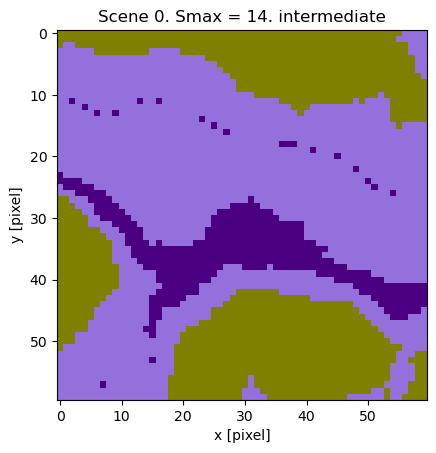

		elapsed time 13.32 seconds.
Total elapsed time 18.15 seconds.
Check out the plots produced in d:\MPI-BGC\1_IRS4BEF_LPF\3_BOSSE\tutorial_bosse_v1_0_figures\bosse_outputs\intermediate\Plots


In [9]:
bosse_M.initialize_scene(0, seednum_=100, verbose=True)
print('Check out the plots produced in %s' % (
    os.path.abspath(output_folder + inputs_['subfolder_out'] + 'Plots')))

Show the species map

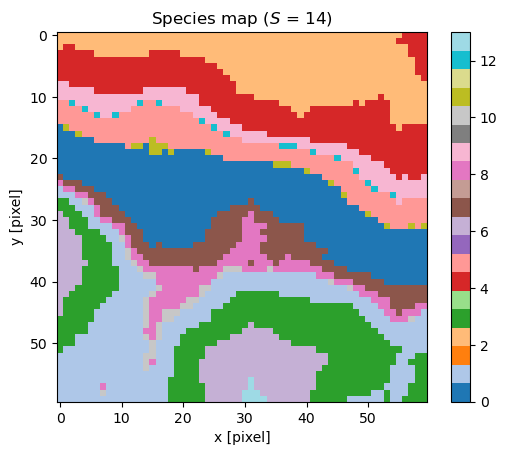

In [10]:
bosse_M.show_bosse_map(
    bosse_M.sp_map, title_lb='Species map ($S$ = %d)' % bosse_M.S_max,
    cmap='tab20', fname=(output_folder + 'tutorial_1-0_SpMap_' +
                         inputs_['sp_pattern'] + '.png'), plt_show=True)

## **2) SIMULATION**
This section shows how to use the BOSSE class to simulate different variables and Scenes

For these simulations, select a summer day

In [11]:
t_ = int(30 * 6.5)

### 2.1) Traits and environmental variables

Get the plant traits, soil, and meteorological variables

In [12]:
print(f'Generating variables at DoY {t_}: ', bosse_M.all_vars) 
X_ = bosse_M.pred_scene_timestamp(t_, 'meteo_mdy', 'indx_mdy')

Generating variables at DoY 195:  ['N', 'Cab', 'Cca', 'Cant', 'Cs', 'Cw', 'Cdm', 'LIDFa', 'LIDFb', 'LAI', 'hc', 'leafwidth', 'Vcmo', 'm', 'kV', 'Rdparam', 'Type', 'stressfactor', 'BSMBrightness', 'BSMlat', 'BSMlon', 'SMC', 'FC', 'tts', 'tto', 'psi', 'Gfrac', 'rss', 'rss_level', 'Rin', 'Rli', 'Ta', 'p', 'ea', 'u']


Plot LAI and leaf chlorophyll content

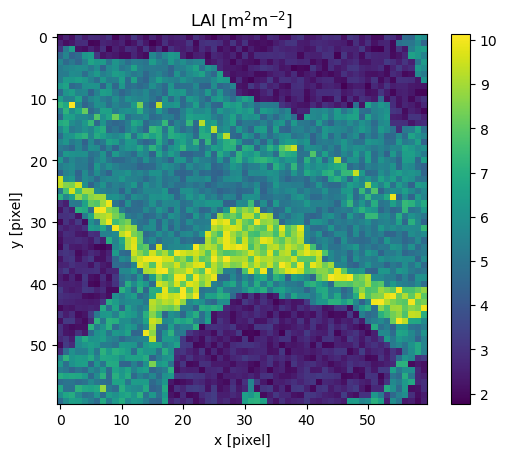

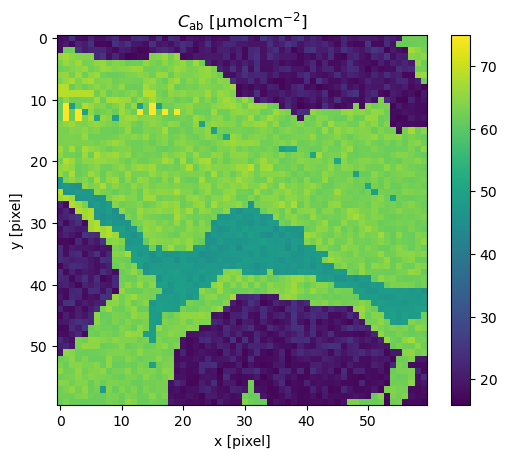

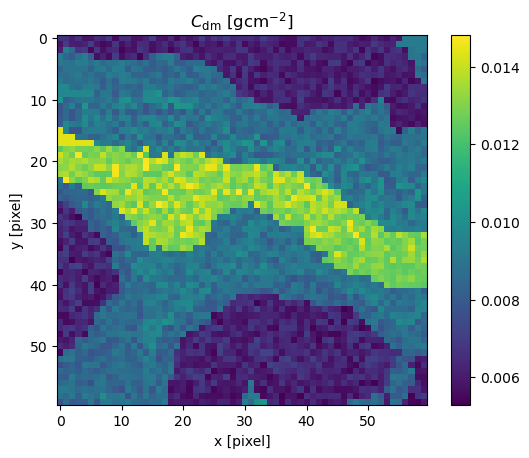

These plots produced from now on are stored in d:\MPI-BGC\1_IRS4BEF_LPF\3_BOSSE\tutorial_bosse_v1_0_figures


In [13]:
bosse_M.show_bosse_map(
    X_[:, :, bosse_M.all_vars.index('LAI')],
    title_lb=bosse_M.get_variable_label('LAI'), plt_show=True, fname=(
        output_folder + 'tutorial_2-1_PT-LAI_' + inputs_['sp_pattern'] + '.png'))
bosse_M.show_bosse_map(
    X_[:, :, bosse_M.all_vars.index('Cab')],
    title_lb=bosse_M.get_variable_label('Cab'), plt_show=True, fname=(
        output_folder + 'tutorial_2-1_PT-Cab_' + inputs_['sp_pattern'] + '.png'))
bosse_M.show_bosse_map(
    X_[:, :, bosse_M.all_vars.index('Cdm')],
    title_lb=bosse_M.get_variable_label('Cdm'), plt_show=True, fname=(
        output_folder + 'tutorial_2-1_PT-Cdm_' + inputs_['sp_pattern'] + '.png'))

print('These plots produced from now on are stored in %s' %
      os.path.abspath(output_folder))

### 2.2) Reflectance factors

Get the reflectance factors

In [14]:
RF_ = bosse_M.pred_refl_factors(X_, inputs_['scene_sz'],
                                sp_res=inputs_['spat_res'])
print('Size of the hyperspectral cube: %d x %d x %d' % RF_.shape)

Size of the hyperspectral cube: 60 x 60 x 2001


Plot species' reflectance factors spectra

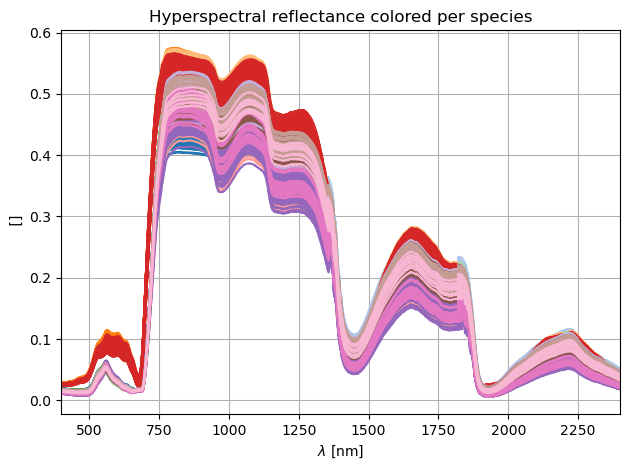

In [15]:
bosse_M.plot_species_spectra(bosse_M.M_R['wl'], RF_,
                             bosse_M.get_variable_label('R'), plt_show=True,
                             fname=(output_folder + 'tutorial_2-2_RF' +
                                    inputs_['sp_pattern'] +'.png'))

 Show the NDVI image

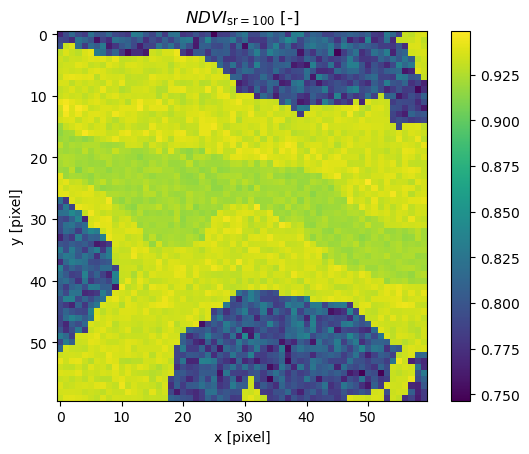

In [16]:
I_red = bosse_M.M_R['wl'] == 650
I_nir = bosse_M.M_R['wl'] == 800
NDVI_ = ((RF_[:, :, I_nir] - RF_[:, :, I_red]) /
         (RF_[:, :, I_nir] + RF_[:, :, I_red]))
bosse_M.show_bosse_map(NDVI_, title_lb='$NDVI_{\\rm sr=100}$ [-]',
                       plt_show=True, fname=(output_folder +
                                             'tutorial_2-2_RF100-NDVI_' +
                                             inputs_['sp_pattern'] + '.png'))

Get the reflectance factors at degraded spatial resolutions and show the NDVI

Size of the hyperspectral cube: 54 x 54 x 2001


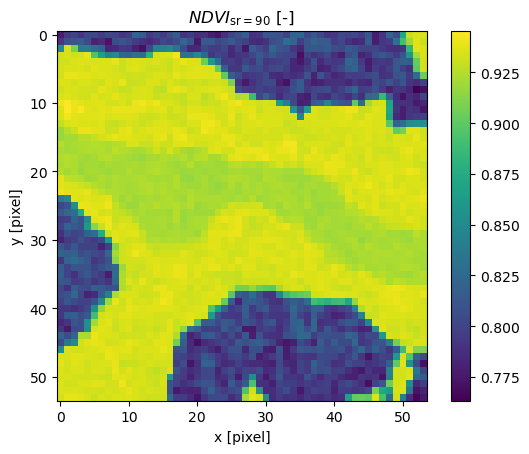

Size of the hyperspectral cube: 36 x 36 x 2001


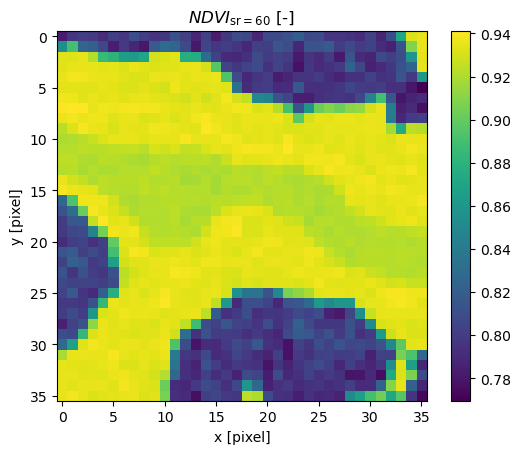

Size of the hyperspectral cube: 18 x 18 x 2001


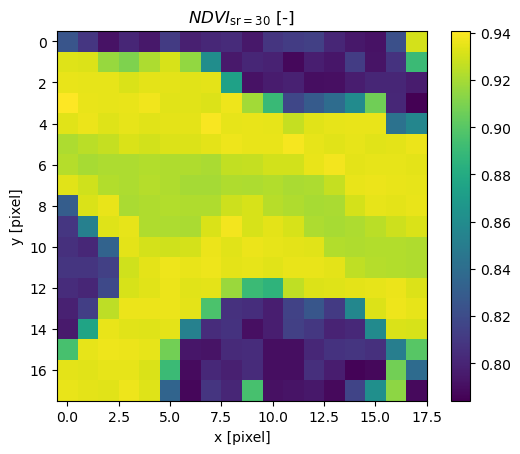

Size of the hyperspectral cube: 6 x 6 x 2001


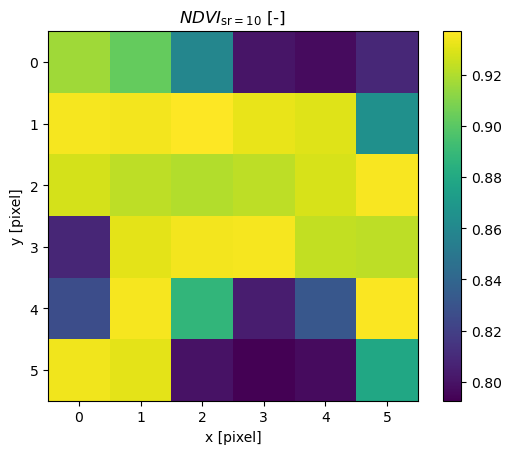

Size of the hyperspectral cube: 3 x 3 x 2001


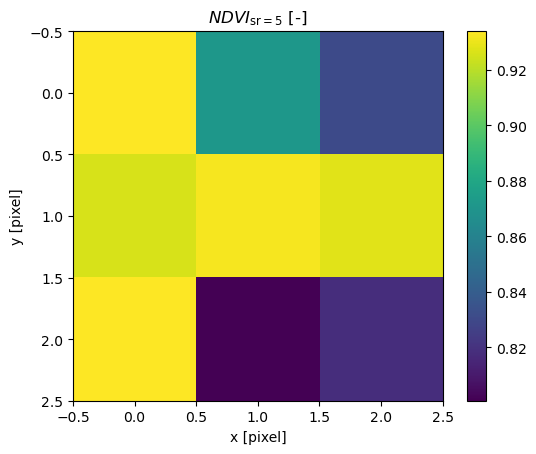

In [17]:
spatial_resolutions = [90, 60, 30, 10, 5]
for sr_ in spatial_resolutions:
    RF_sr_deg = bosse_M.pred_refl_factors(X_, inputs_['scene_sz'], sp_res=sr_)
    print('Size of the hyperspectral cube: %d x %d x %d' % RF_sr_deg.shape)

    NDVI_sr_deg = ((RF_sr_deg[:, :, I_nir] - RF_sr_deg[:, :, I_red]) /
                   (RF_sr_deg[:, :, I_nir] + RF_sr_deg[:, :, I_red]))
    bosse_M.show_bosse_map(
        NDVI_sr_deg, title_lb='$NDVI_{\\rm sr=%d}$ [-]' % sr_, plt_show=True,
        fname=(output_folder + ('tutorial_2-2_RF%d-NDVI_' % sr_) +
               inputs_['sp_pattern'] + '.png'))

Get the reflectance factors with a constant 0.1 absolute random noise

In [18]:
RF_n01 = bosse_M.pred_refl_factors(X_, inputs_['scene_sz'],
                                   sp_res=inputs_['spat_res'],
                                   abs_rand_noise=.01, rand_seed=100)

Get the reflectance factors adding random raising from 0.25 % to 0.50 % from  400 mn to 2400 nm

In [19]:
RF_n25_50 = bosse_M.pred_refl_factors(X_, inputs_['scene_sz'],
                                      sp_res=inputs_['spat_res'],
                                      rel_rand_noise=np.linspace(
                                         .025, .05, RF_.shape[2]),
                                      rand_seed=200)

Plot the hyperspectral reflectance factors with and without noise

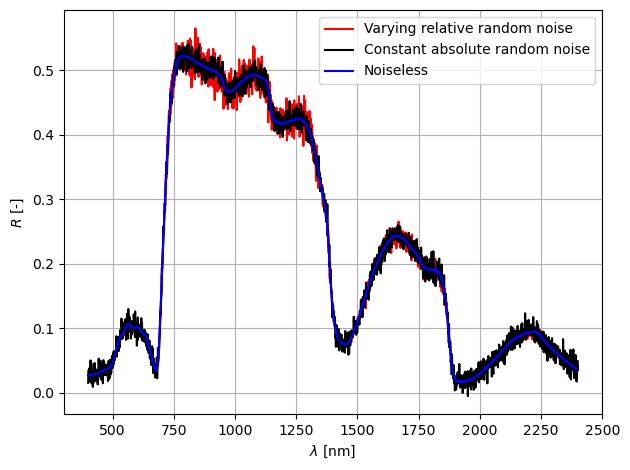

In [20]:
plt.figure()
plt.grid()
plt.plot(bosse_M.M_R['wl'], RF_n25_50[0, 0, :], 'r', label='Varying relative random noise')
plt.plot(bosse_M.M_R['wl'], RF_n01[0, 0, :], 'k', label='Constant absolute random noise')
plt.plot(bosse_M.M_R['wl'], RF_[0, 0, :], 'b', label='Noiseless')
plt.xlabel('$\\lambda$ [nm]')
plt.ylabel('$R$ [-]')
plt.legend()
plt.tight_layout()
plt.savefig((output_folder + 'tutorial_2-2_RF_noises' + inputs_['sp_pattern'] +
             '.png'), dpi=300)
plt.show(block=False)

### 2.3) Optical traits 

Retrieval of optical traits from reflectance and sun zenith angle

In [21]:
print('The estimated plant traits are: ', bosse_M.M_Rinv['pred_vars'])
RF_size = RF_.shape
ones_layer = np.ones((RF_size[0] * RF_size[1], 1))

The estimated plant traits are:  ['N', 'Cab', 'Cca', 'Cant', 'Cs', 'Cw', 'Cdm', 'LIDFa', 'LIDFb', 'LAI', 'hc', 'leafwidth']


Retrieval of optical traits from reflectance factors without noise

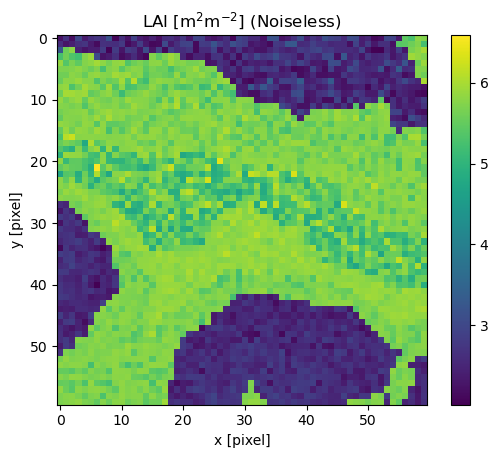

In [22]:
OT_ = bosse_M.pred_opt_traits(np.concatenate((
    bosse_M.transf3D_2_2D(RF_), ones_layer *
    bosse_M.meteo_mdy.loc[t_, 'tts']), axis=1), RF_size[0])
bosse_M.show_bosse_map(OT_[:, :, bosse_M.all_vars.index('LAI')],
                       title_lb=(bosse_M.get_variable_label('LAI') +
                                 ' (Noiseless)'), plt_show=True,
                       fname=(output_folder + 'tutorial_2-3_OT-LAI_' +
                              inputs_['sp_pattern'] + '.png'))

Retrieval of optical traits from reflectance factors with constant 0.1 absolute random noise

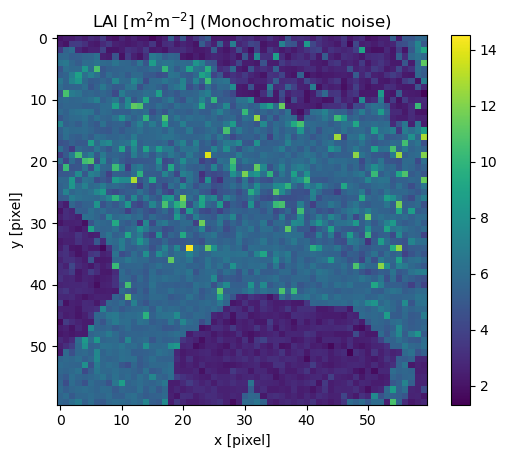

In [23]:
OT_n01 = bosse_M.pred_opt_traits(np.concatenate((
    bosse_M.transf3D_2_2D(RF_n01), ones_layer *
    bosse_M.meteo_mdy.loc[t_, 'tts']), axis=1), RF_size[0])
bosse_M.show_bosse_map(OT_n01[:, :, bosse_M.all_vars.index('LAI')],
                       title_lb=(bosse_M.get_variable_label('LAI') +
                                 ' (Monochromatic noise)'),
                       plt_show=True,
                       fname=(output_folder + 'tutorial_2-3_OTn01-LAI_' +
                              inputs_['sp_pattern'] + '.png'))

Retrieval of optical traits from reflectance factors with noise raising from 0.25 % to 0.50 % from 400 mn to 2400 nm

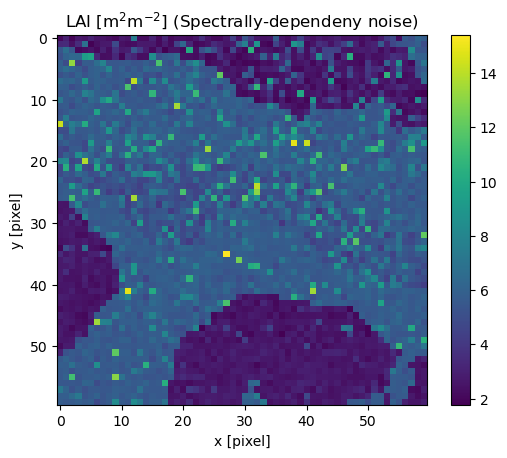

In [24]:
OT_n25_50 = bosse_M.pred_opt_traits(np.concatenate((
    bosse_M.transf3D_2_2D(RF_n25_50), ones_layer *
    bosse_M.meteo_mdy.loc[t_, 'tts']), axis=1), RF_size[0])
bosse_M.show_bosse_map(OT_n25_50[:, :, bosse_M.all_vars.index('LAI')],
                       title_lb=(bosse_M.get_variable_label('LAI') +
                                 ' (Spectrally-dependeny noise)'),
                       plt_show=True,
                       fname=(output_folder + 'tutorial_2-3_OTn25-50-LAI_' +
                              inputs_['sp_pattern'] + '.png'))

### 2.4) Sun-induced chlorophyll fluorescence

Get sun-induced chlorophyll fluorescence radiances

In [25]:
F_ = bosse_M.pred_fluorescence_rad(X_, inputs_['scene_sz'],
                                   inputs_['scene_sz'],
                                   sp_res=inputs_['spat_res'])

Plot species' sun-induced chlorophyll fluorescence radiance spectra

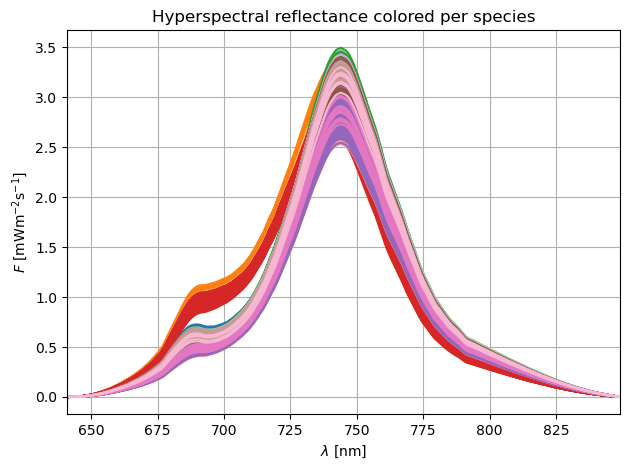

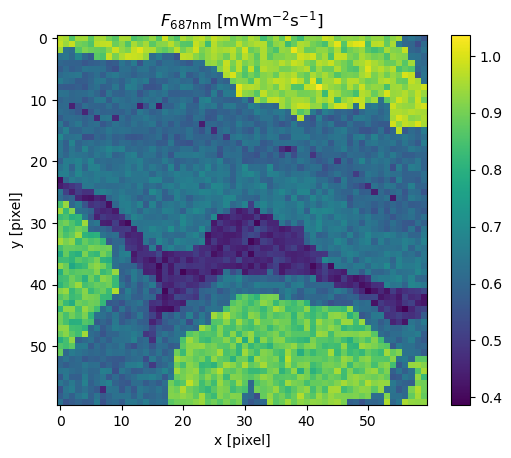

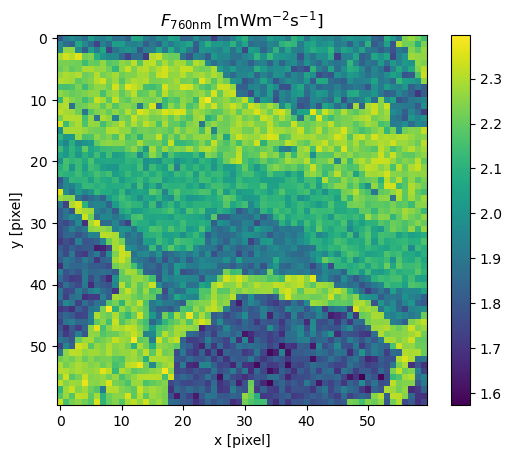

In [26]:
bosse_M.plot_species_spectra(bosse_M.M_F['wl'], F_,
                             bosse_M.get_variable_label('F'), plt_show=True,
                             fname=(output_folder + 'tutorial_2-4_F' +
                                    inputs_['sp_pattern'] +'.png'))

bosse_M.show_bosse_map(F_[:, :, bosse_M.M_F['wl']==687],
                       title_lb=bosse_M.get_variable_label(
                           'F', subscript='\\rm 687nm'), plt_show=True,
                       fname=(output_folder + 'tutorial_2-4_F-687_' +
                              inputs_['sp_pattern'] + '.png'))
bosse_M.show_bosse_map(F_[:, :, bosse_M.M_F['wl']==760],
                       title_lb=bosse_M.get_variable_label(
                           'F', subscript='\\rm 760nm'), plt_show=True,
                       fname=(output_folder + 'tutorial_2-4_F-760_' +
                              inputs_['sp_pattern'] + '.png'))

Get sun-induced chlorophyll fluorescence radiances with 0.05 % noise

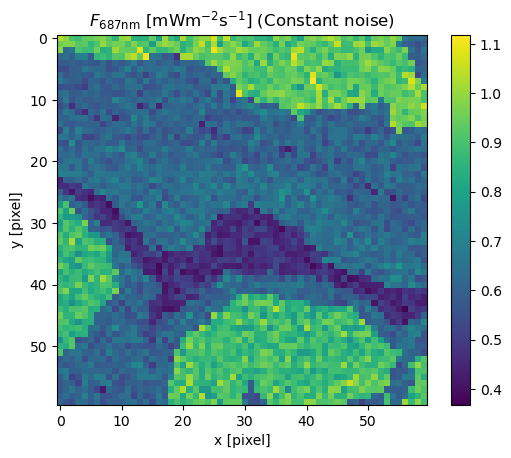

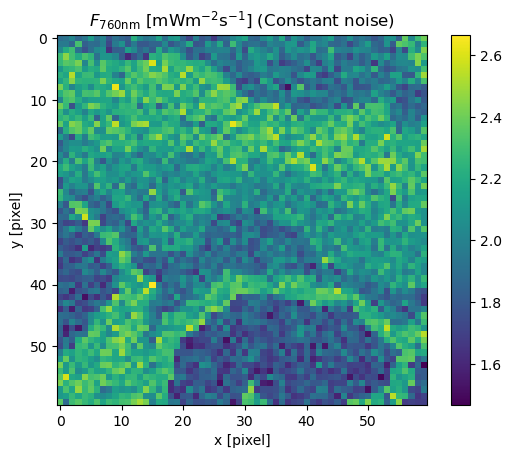

In [27]:
F_n50 = bosse_M.pred_fluorescence_rad(X_, inputs_['scene_sz'],
                                      inputs_['scene_sz'],
                                      sp_res=inputs_['spat_res'],
                                      rel_rand_noise=.05)
bosse_M.show_bosse_map(F_n50[:, :, bosse_M.M_F['wl']==687],
                       title_lb=(bosse_M.get_variable_label(
                           'F', subscript='\\rm 687nm') + ' (Constant noise)'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-4_Fn50-687_' +
                           inputs_['sp_pattern'] + '.png'))
bosse_M.show_bosse_map(F_n50[:, :, bosse_M.M_F['wl']==760],
                       title_lb=(bosse_M.get_variable_label(
                           'F', subscript='\\rm 760nm') + ' (Constant noise)'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-4_Fn50-760_' +
                           inputs_['sp_pattern'] + '.png'))

### 2.5) Land Surface Temperature

Get Land Surface Temperature without noise

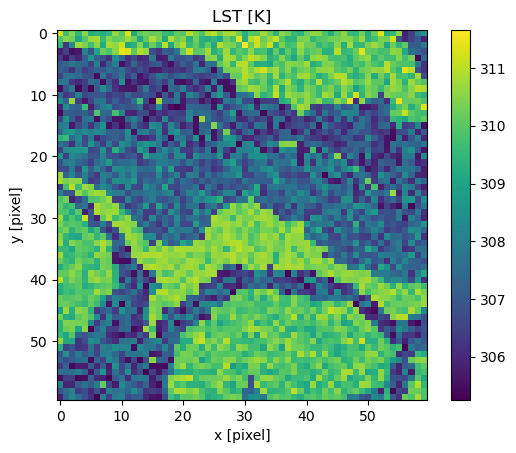

In [28]:
LST_ = bosse_M.pred_landsurf_temp(X_, inputs_['scene_sz'],
                                  sp_res=inputs_['spat_res'])
bosse_M.show_bosse_map(LST_, title_lb=bosse_M.get_variable_label('LST'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-5_LST_' +
                           inputs_['sp_pattern'] + '.png'))

Get Lands Surface Temperature with noise described in absolute terms: 1 K

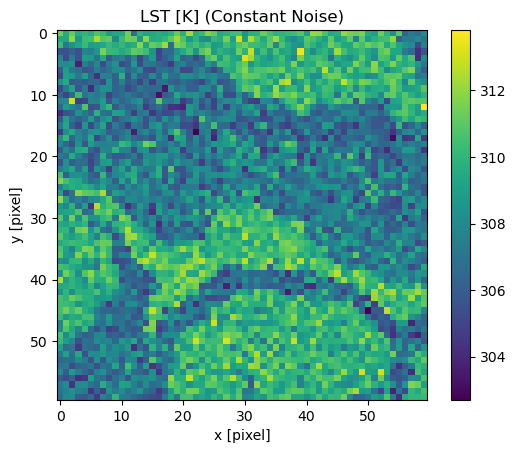

In [29]:
LST_1K = bosse_M.pred_landsurf_temp(X_, inputs_['scene_sz'],
                                    sp_res=inputs_['spat_res'],
                                    abs_rand_noise=1.)
bosse_M.show_bosse_map(LST_1K, title_lb=(bosse_M.get_variable_label('LST') +
                                         ' (Constant Noise)'), plt_show=True,
                       fname=(output_folder + 'tutorial_2-5_LST1K_' +
                              inputs_['sp_pattern'] + '.png'))

## 2.6) Ecosystem functions

Get the plant traits, soil, and meteorological variables at midday of the same summer day than before.

In [30]:
t_ = int(30 * 6.5 * 24 + 12)
X_ = bosse_M.pred_scene_timestamp(t_ , 'meteo_', 'indx_day')

Get the plant traits, soil, and meteorological variables at midday

In [31]:
(time_out, GPP, Rb, Rb_15C, NEP, LUE, LUEgreen, lE, T, H, Rn, G, ustar
 ) = bosse_M.pred_ecosys_funct(t_, X_, 'meteo_', output_map=True)

Plot some fluxes as maps

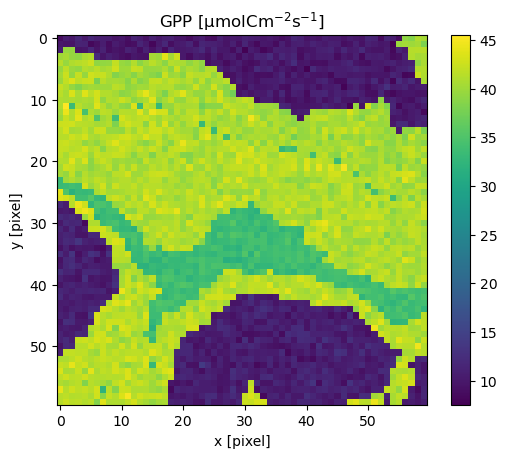

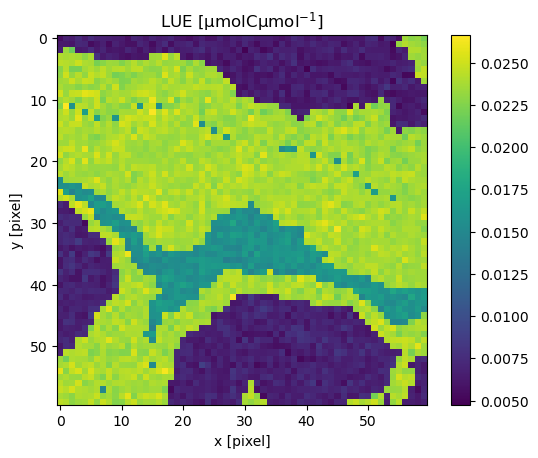

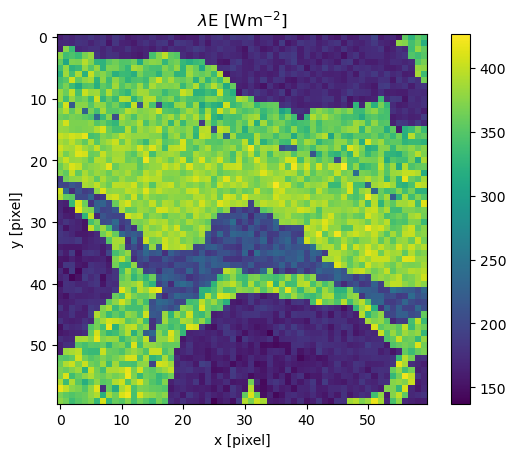

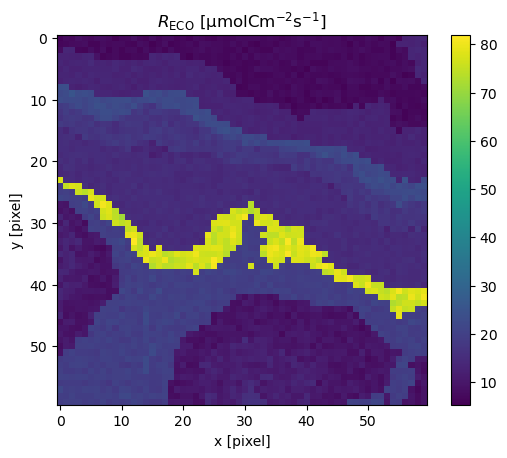

In [32]:
bosse_M.show_bosse_map(GPP, title_lb=bosse_M.get_variable_label('GPP'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-6_eFun_GPP_' +
                           inputs_['sp_pattern'] + '.png'))

bosse_M.show_bosse_map(LUE, title_lb=bosse_M.get_variable_label('LUE'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-6_eFun_LUE_' +
                           inputs_['sp_pattern'] + '.png'))

bosse_M.show_bosse_map(lE, title_lb=bosse_M.get_variable_label('lE'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-6_eFun_lE_' +
                           inputs_['sp_pattern'] + '.png'))

bosse_M.show_bosse_map(Rb, title_lb=bosse_M.get_variable_label('Rb'),
                       plt_show=True, fname=(
                           output_folder + 'tutorial_2-6_eFun_Rb_' +
                           inputs_['sp_pattern'] + '.png'))

Plot a diel series of the Scene averaged fluxes accross the day. Also, add a 10 % random noise

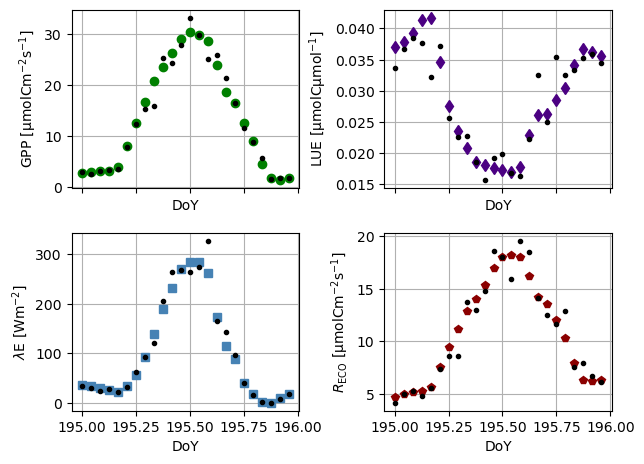

In [33]:
fig, ax = plt.subplots(2, 2, sharex=True)
ax[0, 0].set_ylabel(bosse_M.get_variable_label('GPP'))
ax[0, 1].set_ylabel(bosse_M.get_variable_label('LUE'))
ax[1, 0].set_ylabel(bosse_M.get_variable_label('lE'))
ax[1, 1].set_ylabel(bosse_M.get_variable_label('Rb'))

ax[0, 0].set_xlabel('DoY')
ax[0, 1].set_xlabel('DoY')
ax[1, 0].set_xlabel('DoY')
ax[1, 1].set_xlabel('DoY')

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()
plt.tight_layout()

t0_ = int(30 * 6.5 * 24)
for i_ in range(24):
    X_ = bosse_M.pred_scene_timestamp(t0_ + i_, 'meteo_', 'indx_day')
    
    (t_out, GPP, Rb, Rb_15C, NEP, LUE, LUEgreen, lE, T, H, Rn, G, ustar
     ) = bosse_M.pred_ecosys_funct(t0_ + i_, X_, 'meteo_', output_map=False)
     
    (t_out, GPPn, Rbn, Rb_15Cn, NEPn, LUEn, LUEgreenn, lEn, Tn, Hn, Rnn, Gn, ustarn
     ) = bosse_M.pred_ecosys_funct(t0_ + i_, X_, 'meteo_', output_map=False,
                                   rel_rand_noise=0.1, rand_seed=i_ * 50)

    ax[0, 0].plot(30 * 6.5 + i_ / 24, GPP, 'o', c='Green')
    ax[0, 0].plot(30 * 6.5 + i_ / 24, GPPn, '.', c='k')
    ax[0, 1].plot(30 * 6.5 + i_ / 24, LUE, 'd', c='Indigo')
    ax[0, 1].plot(30 * 6.5 + i_ / 24, LUEn, '.', c='k')
    ax[1, 0].plot(30 * 6.5 + i_ / 24, lE, 's', c='SteelBlue')
    ax[1, 0].plot(30 * 6.5 + i_ / 24, lEn, '.', c='k')
    ax[1, 1].plot(30 * 6.5 + i_ / 24, Rb, 'p', c='DarkRed')
    ax[1, 1].plot(30 * 6.5 + i_ / 24, Rbn, '.', c='k')
    
plt.show(block=False)
fig.savefig((output_folder + 'tutorial_2-6_eFun_timeseries_' +
             inputs_['sp_pattern'] + '.png'), dpi=300)

## **3) ANALYSIS**

### 3.1) Introduciton to pyGNDiv

Define a function that computes Rao Q and variance-based diveristy partitioning to the plant traits, hypersepectral reflectance factors, and retrieved optical traits from a given scene and time

In [34]:
def apply_pyGNDiv(bosse_M, PT_, RF_, OT_):   
    # Plant traits
    # PCA
    PCA_in = gni.apply_pca_cube(PT_)
    # Rao Q
    raoQ_PT, _ = gni.raoQ_grid(PCA_in, wsz_=3)
    # Variance-based diveristy partitioning
    (SSalpha_PT, SSbeta_PT, SSgamma_PT, f_alpha_PT, f_beta_PT, frac_used_PT
    ) = gni.varpart_grid(PCA_in, wsz_=3)

    # Reflectance factors
    # PCA
    PCA_in = gni.apply_pca_cube(RF_)
    # Rao Q
    raoQ_RF, _ = gni.raoQ_grid(PCA_in, wsz_=3)
    # Variance-based diveristy partitioning
    (SSalpha_RF, SSbeta_RF, SSgamma_RF, f_alpha_RF, f_beta_RF, frac_used_RF
    ) = gni.varpart_grid(PCA_in, wsz_=3)

    # Optical traits 
    # PCA
    PCA_in = gni.apply_pca_cube(OT_)
    # Rao Q
    raoQ_OT, _ = gni.raoQ_grid(PCA_in, wsz_=3)
    # Variance-based diveristy partitioning
    (SSalpha_OT, SSbeta_OT, SSgamma_OT, f_alpha_OT, f_beta_OT, frac_used_OT
    ) = gni.varpart_grid(PCA_in, wsz_=3)
    
    return(raoQ_PT['RaoQ_mean'], f_alpha_PT, f_beta_PT,
           raoQ_RF['RaoQ_mean'], f_alpha_RF, f_beta_RF,
           raoQ_OT['RaoQ_mean'], f_alpha_OT, f_beta_OT)

## 3.2) Example computing diversity for different spatial patterns

For these simulations, select a summer day

In [35]:
t_ = int(30 * 6.5)

Preallocate output

In [36]:
bosse_spatial_patterns = bosse_M.get_input_descriptors('sp_pattern')

df = pd.DataFrame(
    data=np.concatenate((np.array([bosse_spatial_patterns]).T,
                         np.zeros((3, 9))), axis=1),
    columns=['Spatial_Pattern',
             'RaoQ_PT', 'f_alpha_PT', 'f_beta_PT',
              'RaoQ_RF', 'f_alpha_RF', 'f_beta_RF',
              'RaoQ_OT', 'f_alpha_OT', 'f_beta_OT'])

Locate the NDVI spectral bands

In [37]:
I_red = bosse_M.M_R['wl'] == 650
I_nir = bosse_M.M_R['wl'] == 800

Set to false to speed up the simulation

In [38]:
inputs_['inspect'] = False

Retrieve and partition plant functional diversity for different spatial patterns

clustered *********************************
########################################################################
Initializing scene 0 ...
	Loading meteo data...
		elapsed time 3.81 seconds.
	Generating the Scene...
		elapsed time 3.64 seconds.
Total elapsed time 7.46 seconds.


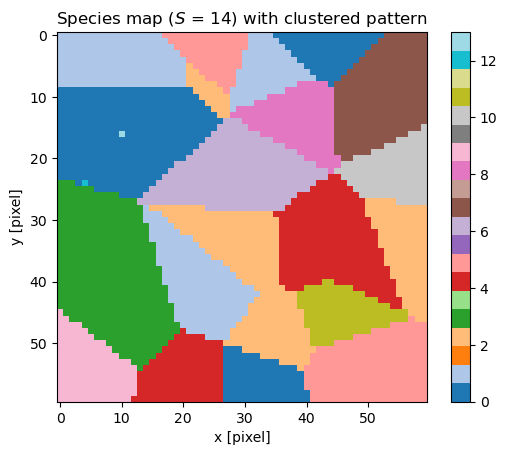

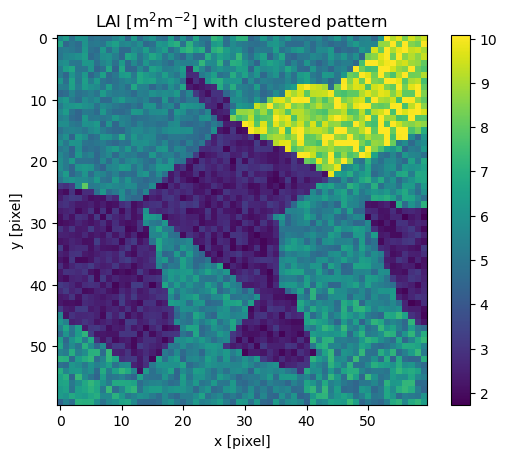

Selecting plant traits:  ['N', 'Cab', 'Cca', 'Cant', 'Cs', 'Cw', 'Cdm', 'LIDFa', 'LIDFb', 'LAI', 'hc', 'leafwidth']


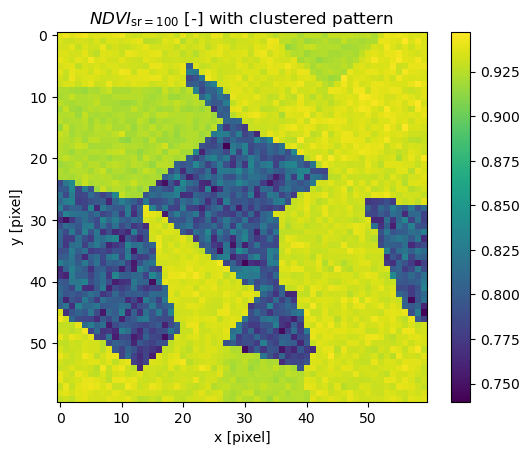

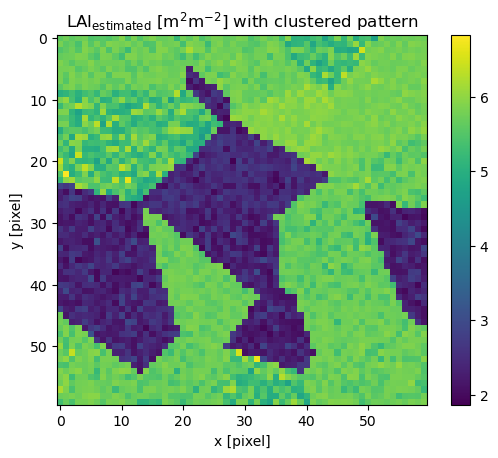

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.01 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.88 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 2.24 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.03 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 3.00 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.00 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 3.04 seconds...

intermediate *********************************
########################################################################
Initializing scene 0 ...
	Loading meteo data...
		elapsed time 4.12 seconds.
	Generating the Scene...
		elapsed time 3.54 seconds.
To

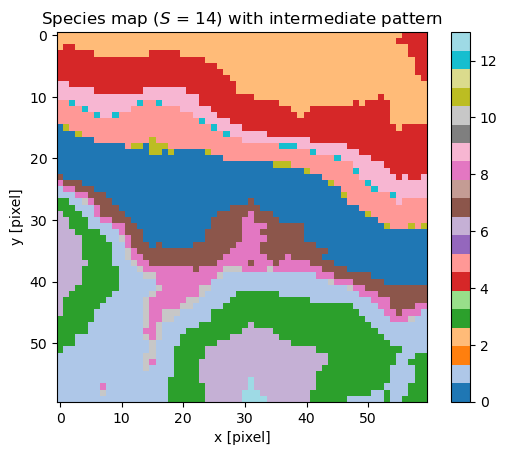

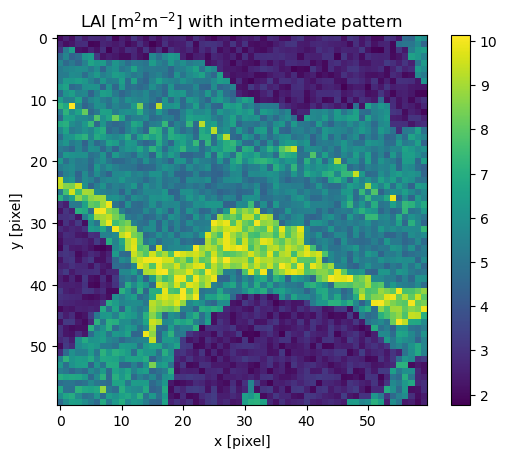

Selecting plant traits:  ['N', 'Cab', 'Cca', 'Cant', 'Cs', 'Cw', 'Cdm', 'LIDFa', 'LIDFb', 'LAI', 'hc', 'leafwidth']


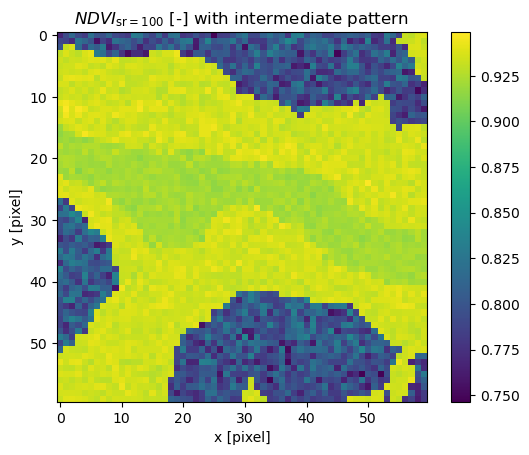

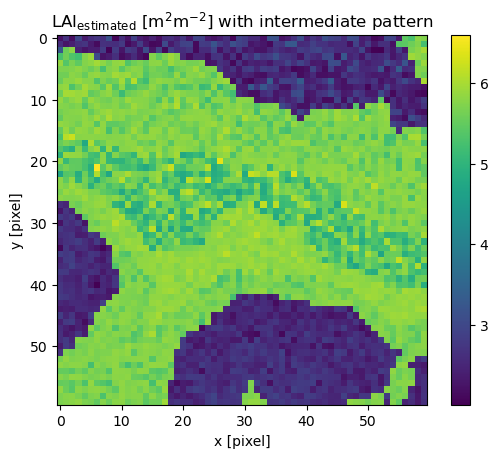

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.00 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.88 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 1.98 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.02 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.87 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.00 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.86 seconds...

even *********************************
########################################################################
Initializing scene 0 ...
	Loading meteo data...
		elapsed time 3.87 seconds.
	Generating the Scene...
		elapsed time 3.50 seconds.
Total elap

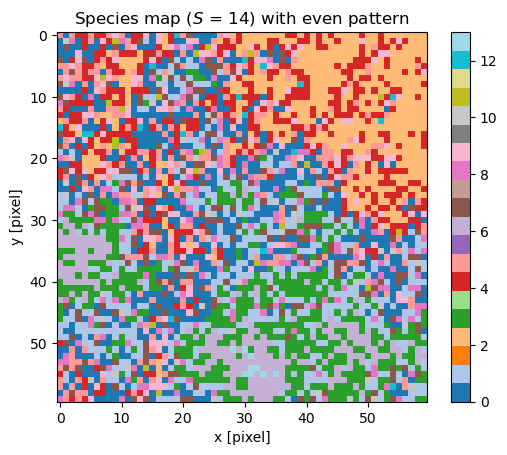

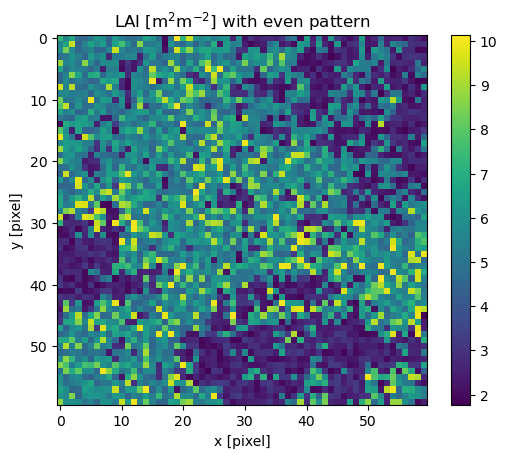

Selecting plant traits:  ['N', 'Cab', 'Cca', 'Cant', 'Cs', 'Cw', 'Cdm', 'LIDFa', 'LIDFb', 'LAI', 'hc', 'leafwidth']


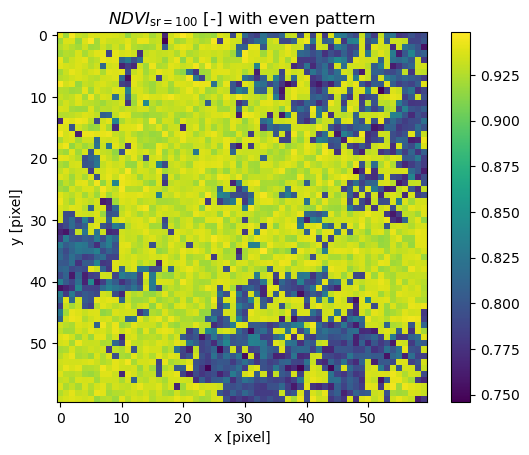

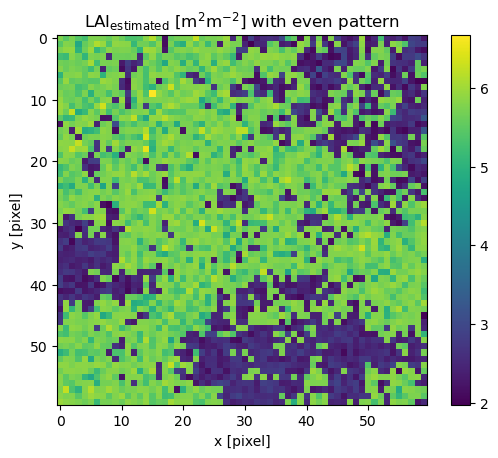

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.01 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.92 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 1.99 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.94 seconds...

Applying Standardization and Dimensionalty Reduction
	Elapsed time: elapsed time 0.00 seconds...

Calculating Rao Q...
	Elapsed time: elapsed time 0.01 seconds...

Partitioning diversity with Variance...
	Elapsed time: elapsed time 2.86 seconds...

  Spatial_Pattern   RaoQ_PT f_alpha_PT  f_beta_PT   RaoQ_RF f_alpha_RF  \
0       clustered  0.035142  17.817334  82.182666  0.045443  24.874679   
1    intermediate  0.034424  18.032653  81.967347    0.0471  27.338779   
2            even  0.070733  61

In [39]:
for i_, sp_ in enumerate(bosse_spatial_patterns):
    print(f'{sp_} *********************************')
    # Update the input options dictionary:
    inputs_['sp_pattern'] = sp_
    
    # Initialize BOSSE class    
    bosse_M = BosseModel(inputs_, paths_)

    # Intialize scene. 0 correspondos to the file name of the meteo file '*_0.nc'
    bosse_M.initialize_scene(0, seednum_=100)

    # Show the species map
    bosse_M.show_bosse_map(bosse_M.sp_map,
                title_lb='Species map ($S$ = %d) with %s pattern' % 
                (bosse_M.S_max, sp_), cmap='tab20', plt_show=True, fname=(
                    output_folder + 'tutorial_3_SpMap_' + inputs_['sp_pattern'] +
                    '.png'))
    
    # Get the plant traits, soil, and meteorological variables
    X_ = bosse_M.pred_scene_timestamp(t_, 'meteo_mdy', 'indx_mdy')
    
    bosse_M.show_bosse_map(X_[:, :, bosse_M.all_vars.index('LAI')],
               title_lb=(bosse_M.get_variable_label('LAI') +
                         ' with %s pattern' % sp_),
               plt_show=True, fname=( output_folder + 'tutorial_3_PT-LAI_' +
                                     inputs_['sp_pattern'] + '.png'))
    
    # Select the plant traits. Match them with the optical traits estimated
    # from the reflectance factors
    print('Selecting plant traits: ', bosse_M.PT_vars[:-2])
    PT_ = X_[:, :, bosse_M.I_pt[:-2]]
    
    # Get the reflectance factors
    RF_ = bosse_M.pred_refl_factors(X_, inputs_['scene_sz'],
                                    sp_res=inputs_['spat_res'])

    NDVI_ = ((RF_[:, :, I_nir] - RF_[:, :, I_red]) /
            (RF_[:, :, I_nir] + RF_[:, :, I_red]))
    bosse_M.show_bosse_map(NDVI_,
                   title_lb='$NDVI_{\\rm sr=100}$ [-] with %s pattern' % sp_,
                   plt_show=True, fname=(output_folder + 'tutorial_3_RF-NDVI_' +
                                         inputs_['sp_pattern'] + '.png'))
    
    # Retrieve the Optical Traits
    RF_size = RF_.shape
    ones_layer = np.ones((RF_size[0] * RF_size[1], 1))
    OT_ = bosse_M.pred_opt_traits(np.concatenate((
        bosse_M.transf3D_2_2D(RF_), ones_layer *
        bosse_M.meteo_mdy.loc[t_, 'tts']), axis=1), RF_size[0])
    bosse_M.show_bosse_map(
        OT_[:, :, bosse_M.all_vars.index('LAI')],
        title_lb=(bosse_M.get_variable_label('LAI',
                                             subscript='\\rm estimated') +
                  ' with %s pattern' % sp_), plt_show=True, fname=(
                      output_folder + 'tutorial_3_OT-LAI_' + inputs_['sp_pattern'] +
                      '.png'))
    
    # Compute diversity estimates and store in the dataframe
    df.iloc[i_, 0] = sp_
    df.iloc[i_, 1:] = apply_pyGNDiv(bosse_M, PT_, RF_, OT_)

# Print the results
print(df)

Plot the diveristy metrics

  Spatial_Pattern   RaoQ_PT f_alpha_PT  f_beta_PT   RaoQ_RF f_alpha_RF  \
0       clustered  0.035142  17.817334  82.182666  0.045443  24.874679   
1    intermediate  0.034424  18.032653  81.967347    0.0471  27.338779   
2            even  0.070733  61.164532  38.835468  0.077663  68.726578   

   f_beta_RF   RaoQ_OT f_alpha_OT  f_beta_OT  
0  75.125321  0.041168  22.591342  77.408658  
1  72.661221   0.04033  20.981885  79.018115  
2  31.273422  0.072646  60.551506  39.448494  


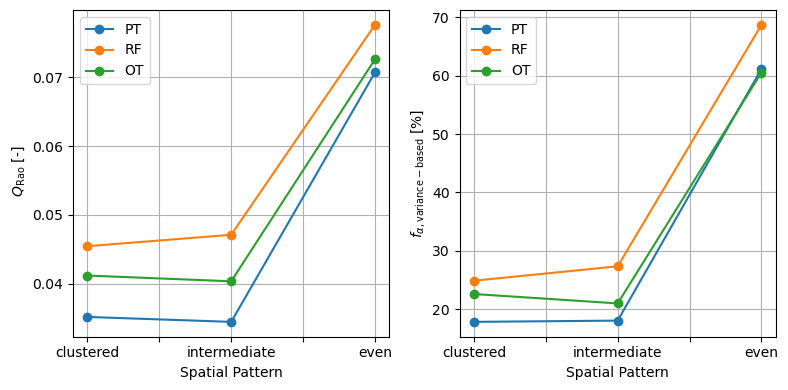

In [40]:
print(df)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
df.plot(x='Spatial_Pattern', y=['RaoQ_PT', 'RaoQ_RF', 'RaoQ_OT'],
        marker='o', ax=ax[0], label=['PT', 'RF', 'OT'])
ax[0].set_xlabel('Spatial Pattern')
ax[0].set_ylabel(' $Q_{\\rm Rao}$ [-]')
ax[0].grid()

df.plot(x='Spatial_Pattern', y=['f_alpha_PT', 'f_alpha_RF', 'f_alpha_OT'],
        marker='o', ax=ax[1], label=['PT', 'RF', 'OT'])
ax[1].set_xlabel('Spatial Pattern')
ax[1].set_ylabel('$f_{\\alpha, \\rm variance-based}$ [%]')
ax[1].grid()

plt.tight_layout()
plt.savefig(output_folder + 'tutorial_3_pyGNDIV_metrics.png', dpi=300)
plt.show(block=False)